# ❓ <font color='green'> <u> PROBLEM STATEMENT (Sentimental Analysis) </u>

## <font color = 'navy'>Sentimental Analysis: 

### 1) Perform sentimental analysis on the Elon-musk tweets (Exlon-musk.csv)

___

### <font color = 'magenta'> <u> STEPS WE PERFORM:</u>
    
* #### 1. We are provided with data of tweets by Elon Musk for Sentiment Analysis.

* #### 2. Text Preprocessing
    
* #### 3. Sentiment Analysis Using TextBlob Library
    
* #### 4. Visualisation (WordCloud)

___

 * ### <font color = 'blue'> <u> IMPORT NECESSARY LIBRARIES </u>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import re
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

from textblob import TextBlob

from wordcloud import WordCloud, STOPWORDS

In [2]:
df = pd.read_csv('Elon_musk.csv', encoding='cp1252')
df.head()

Unnamed: 0                                               Text
0           1                             @kunalb11 I’m an alien
1           2  @ID_AA_Carmack Ray tracing on Cyberpunk with H...
2           3                @joerogan @Spotify Great interview!
3           4                    @gtera27 Doge is underestimated
4           5  @teslacn Congratulations Tesla China for amazi...

In [3]:
df.drop(columns='Unnamed: 0',axis=1,inplace=True)
df.head()

Text
0                             @kunalb11 I’m an alien
1  @ID_AA_Carmack Ray tracing on Cyberpunk with H...
2                @joerogan @Spotify Great interview!
3                    @gtera27 Doge is underestimated
4  @teslacn Congratulations Tesla China for amazi...

In [4]:
print('Total Number of Tweets = ', len(df['Text']))

Total Number of Tweets =  1999


___

* ### <font color = 'blue'> <u> TEXT-PREPROCESSING </u>

In [5]:
lemm=WordNetLemmatizer()

In [6]:
corpus=[]
for i in range(len(df)):
    txt=(re.sub('[^a-zA-Z]',' ',df['Text'][i])).lower()
    
    txt=word_tokenize(txt)
    
    txt=[lemm.lemmatize(i) for i in txt if i not in stopwords.words('english')]
    txt=' '.join(txt)
           
    corpus.append(txt)


In [7]:
corpus

['kunalb alien',
 'id aa carmack ray tracing cyberpunk hdr next level tried',
 'joerogan spotify great interview',
 'gtera doge underestimated',
 'teslacn congratulation tesla china amazing execution last year next even',
 'happy new year ox http co wfkmyu oj',
 'frodo underdoge thought would fail http co zgxjfdzzrm',
 'owensparks flcnhvy anonyx haha thanks',
 'flcnhvy anonyx indeed tweet definitely represent real world time allocation',
 'entertaining outcome likely',
 'givedirectly sent',
 'agree clubhouse kanyewest',
 'http co rwe uhsts',
 'geoffkeighley unrealengine getting real',
 'bought dogecoin lil x toddler hodler',
 'joshmanmode definitely issue sentencing seems bit high',
 'freewalletorg thanks fixing',
 'freewalletorg please unlock account',
 'astrojordy u f u f',
 'true power haha http co fc uhqsd',
 'freewalletorg crypto wallet give private key avoided cost',
 'freewalletorg app suck',
 'rt spacex nasa selected falcon heavy launch first two element lunar gateway together 

In [8]:
len(corpus)

1999

In [9]:
df['corpus']=corpus
df

Text  \
0                                @kunalb11 I’m an alien   
1     @ID_AA_Carmack Ray tracing on Cyberpunk with H...   
2                   @joerogan @Spotify Great interview!   
3                       @gtera27 Doge is underestimated   
4     @teslacn Congratulations Tesla China for amazi...   
...                                                 ...   
1994  @flcnhvy True, it sounds so surreal, but the n...   
1995  @PPathole Make sure to read ur terms &amp; con...   
1996                @TeslaGong @PPathole Samwise Gamgee   
1997  @PPathole Altho Dumb and Dumber is <U+0001F525...   
1998                          Progress update August 28   

                                                 corpus  
0                                          kunalb alien  
1     id aa carmack ray tracing cyberpunk hdr next l...  
2                      joerogan spotify great interview  
3                             gtera doge underestimated  
4     teslacn congratulation tesla china amazing exe...  
...                                                 ...  
1994  flcnhvy true sound surreal negative propaganda...  
1995  ppathole make sure read ur term amp condition ...  
1996                  teslagong ppathole samwise gamgee  
1997                 ppathole altho dumb dumber u f u f  
1998                             progress update august  

[1999 rows x 2 columns]

___

* ### <font color = 'blue'> <u> SENTIMENT ANALYSIS </u>

In [10]:
def get_sentiment(clean):
    analysis = TextBlob(clean)
    polarity = analysis.sentiment.polarity
    if polarity > 0:
        return 'Positive'
    elif polarity < 0:
        return 'Negative'
    else:
        return 'Neutral'

In [11]:
df['sentiment'] = df['corpus'].apply(get_sentiment)
df

Text  \
0                                @kunalb11 I’m an alien   
1     @ID_AA_Carmack Ray tracing on Cyberpunk with H...   
2                   @joerogan @Spotify Great interview!   
3                       @gtera27 Doge is underestimated   
4     @teslacn Congratulations Tesla China for amazi...   
...                                                 ...   
1994  @flcnhvy True, it sounds so surreal, but the n...   
1995  @PPathole Make sure to read ur terms &amp; con...   
1996                @TeslaGong @PPathole Samwise Gamgee   
1997  @PPathole Altho Dumb and Dumber is <U+0001F525...   
1998                          Progress update August 28   

                                                 corpus sentiment  
0                                          kunalb alien  Negative  
1     id aa carmack ray tracing cyberpunk hdr next l...   Neutral  
2                      joerogan spotify great interview  Positive  
3                             gtera doge underestimated   Neutral  
4     teslacn congratulation tesla china amazing exe...  Positive  
...                                                 ...       ...  
1994  flcnhvy true sound surreal negative propaganda...  Positive  
1995  ppathole make sure read ur term amp condition ...  Positive  
1996                  teslagong ppathole samwise gamgee   Neutral  
1997                 ppathole altho dumb dumber u f u f  Negative  
1998                             progress update august   Neutral  

[1999 rows x 3 columns]

> * #### With the help of TextBlob library on the basis of polarity we assigned each tweet it's sentiment.

In [12]:
sentiments = df['sentiment'].value_counts()
sentiments

Neutral     925
Positive    859
Negative    215
Name: sentiment, dtype: int64

___

* ### <font color = 'blue'> <u> VISUALISATION </u>

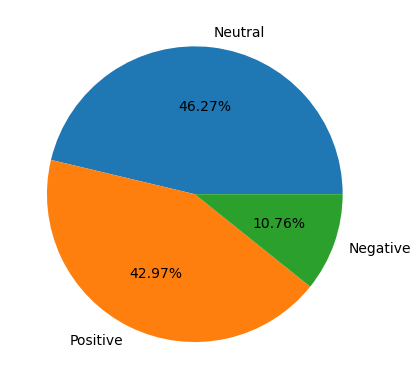

In [13]:
plt.pie(sentiments, 
        labels= ['Neutral','Positive','Negative'],
        autopct= '%0.2f%%')

import warnings 
warnings.filterwarnings('ignore')

In [14]:
positive = df[df['sentiment']=='Positive']
negative = df[df['sentiment']=='Negative']
neutral = df[df['sentiment']=='Neutral']

In [15]:
def word_cloud(data,label):
    txt=' '.join(data['corpus'])
    wc=WordCloud(background_color='white', 
                 width=2000,
                 height=1600,
                 stopwords=STOPWORDS).generate(txt)
    plt.imshow(wc)
    plt.title(label)
    plt.axis('off')

In [16]:
plt.rcParams['figure.figsize']=(8,5)
plt.rcParams['figure.dpi']=500

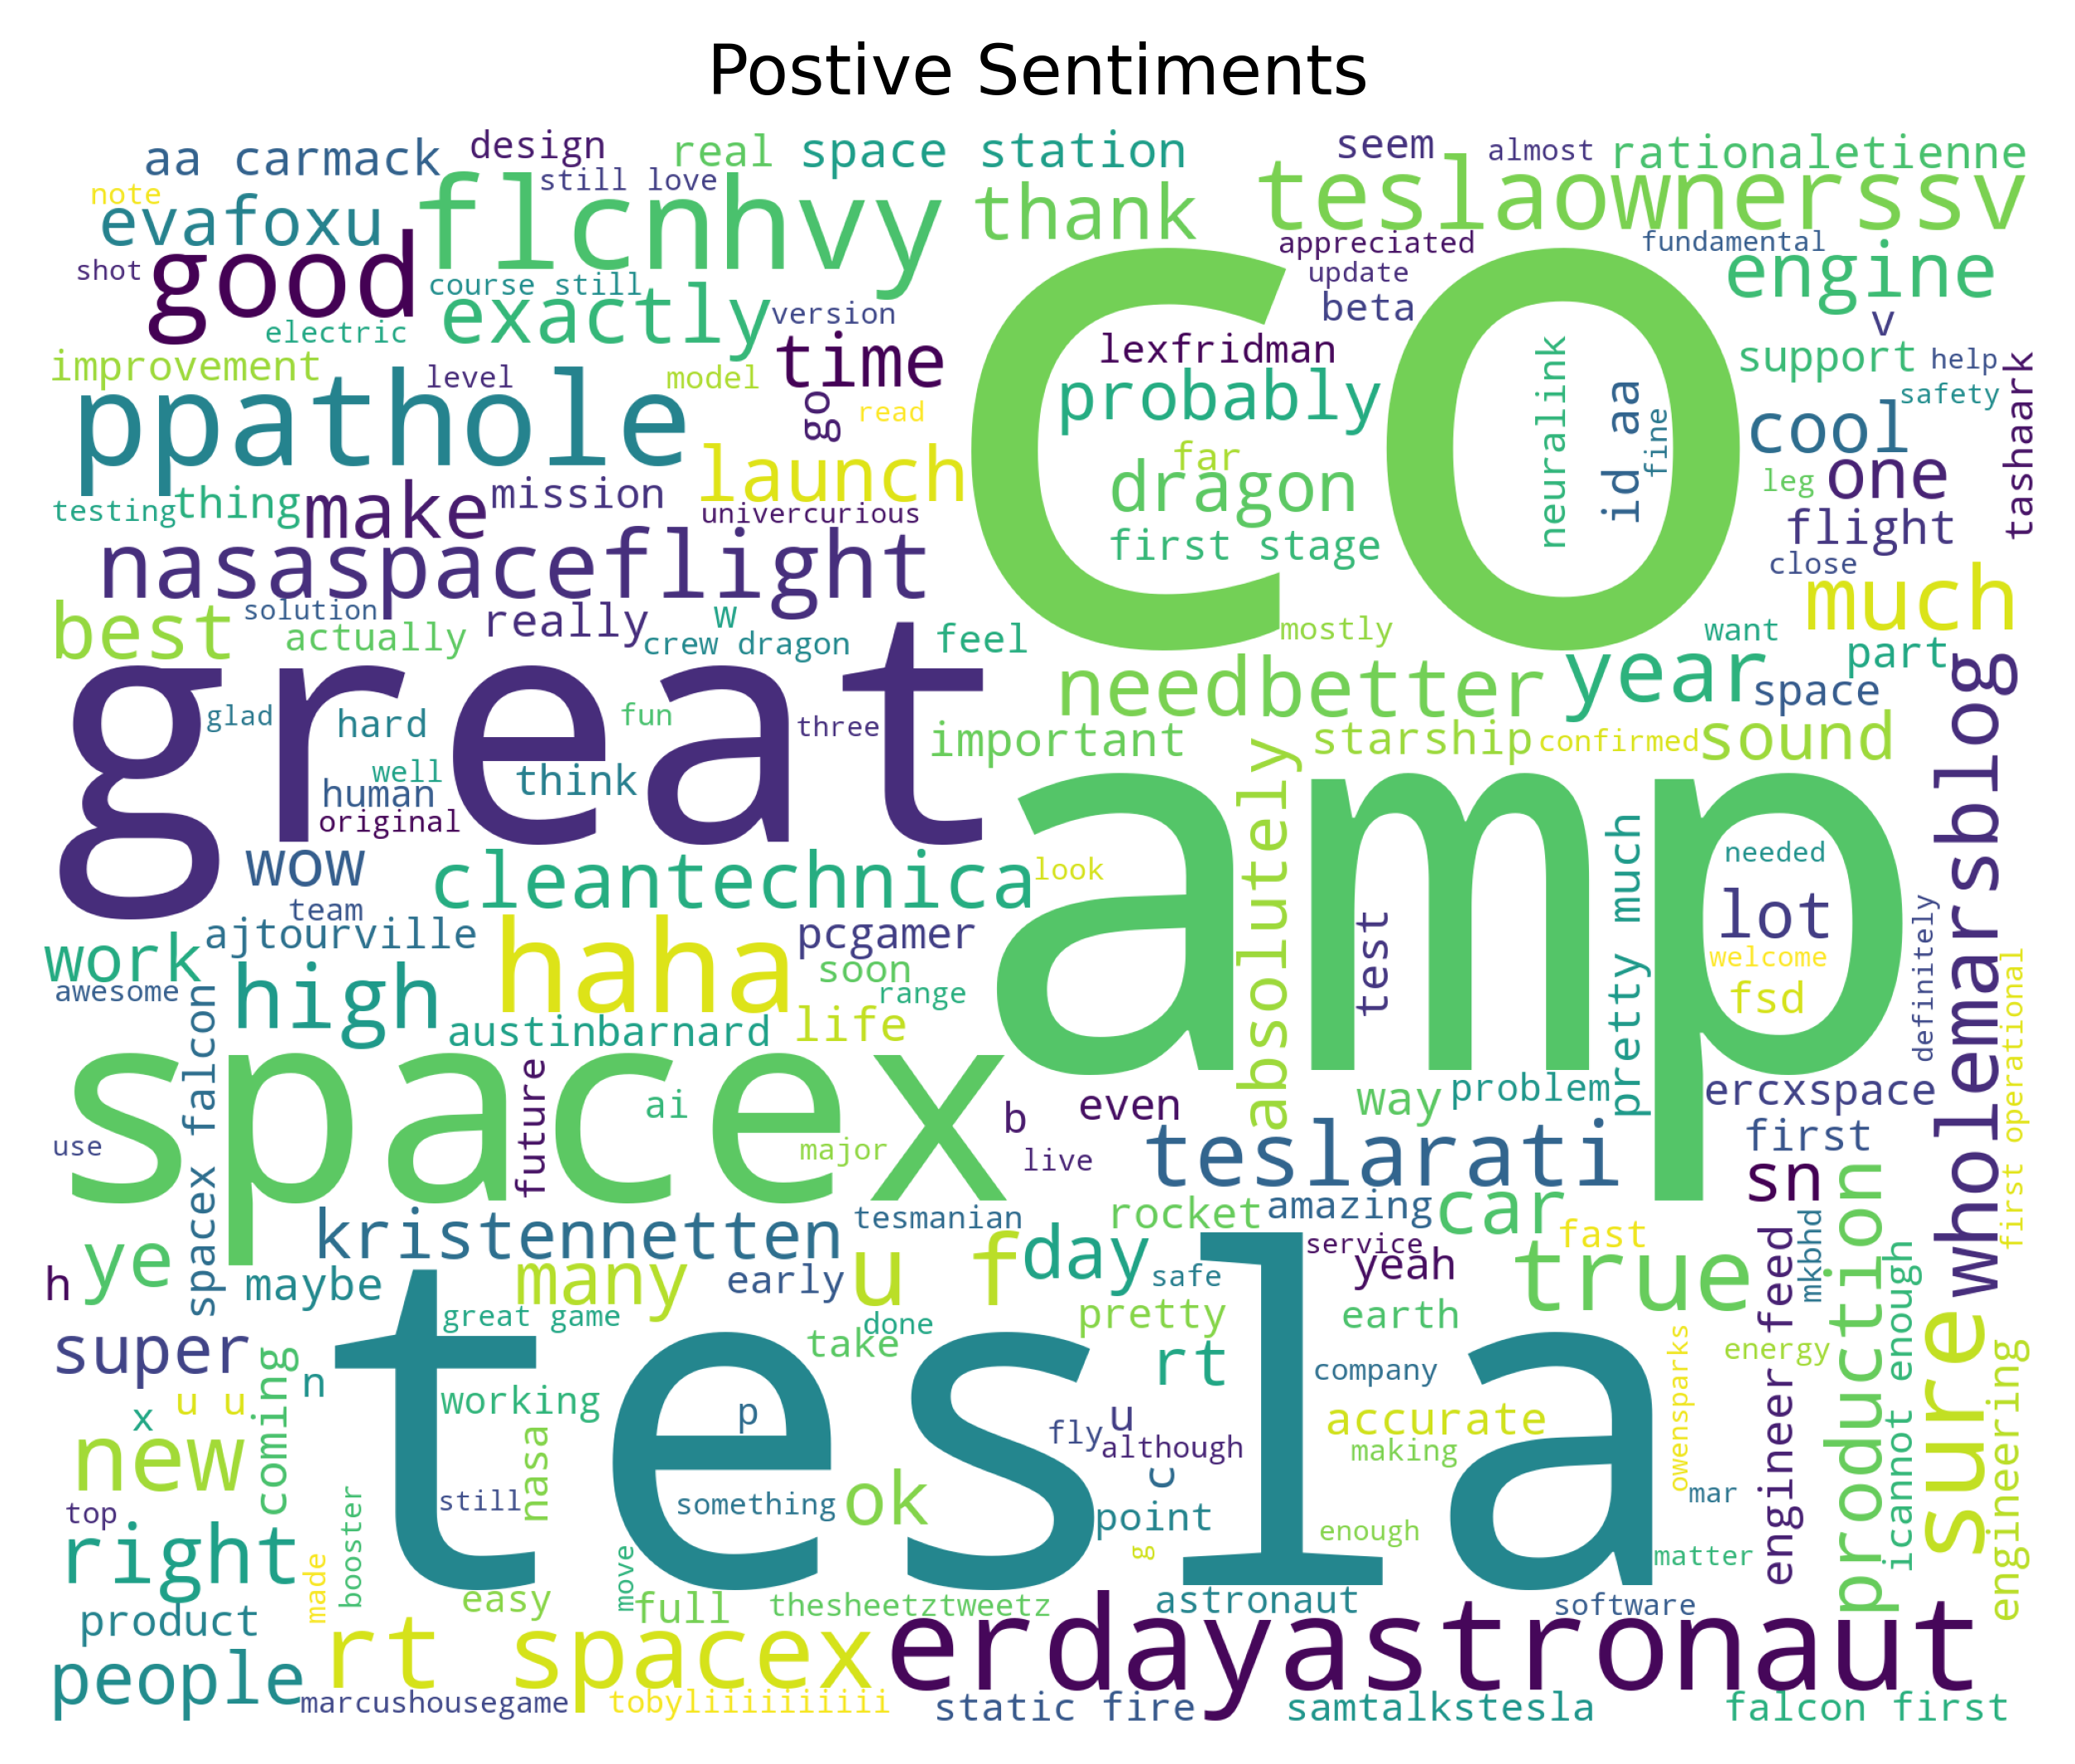

In [17]:
word_cloud(positive,'Postive Sentiments')

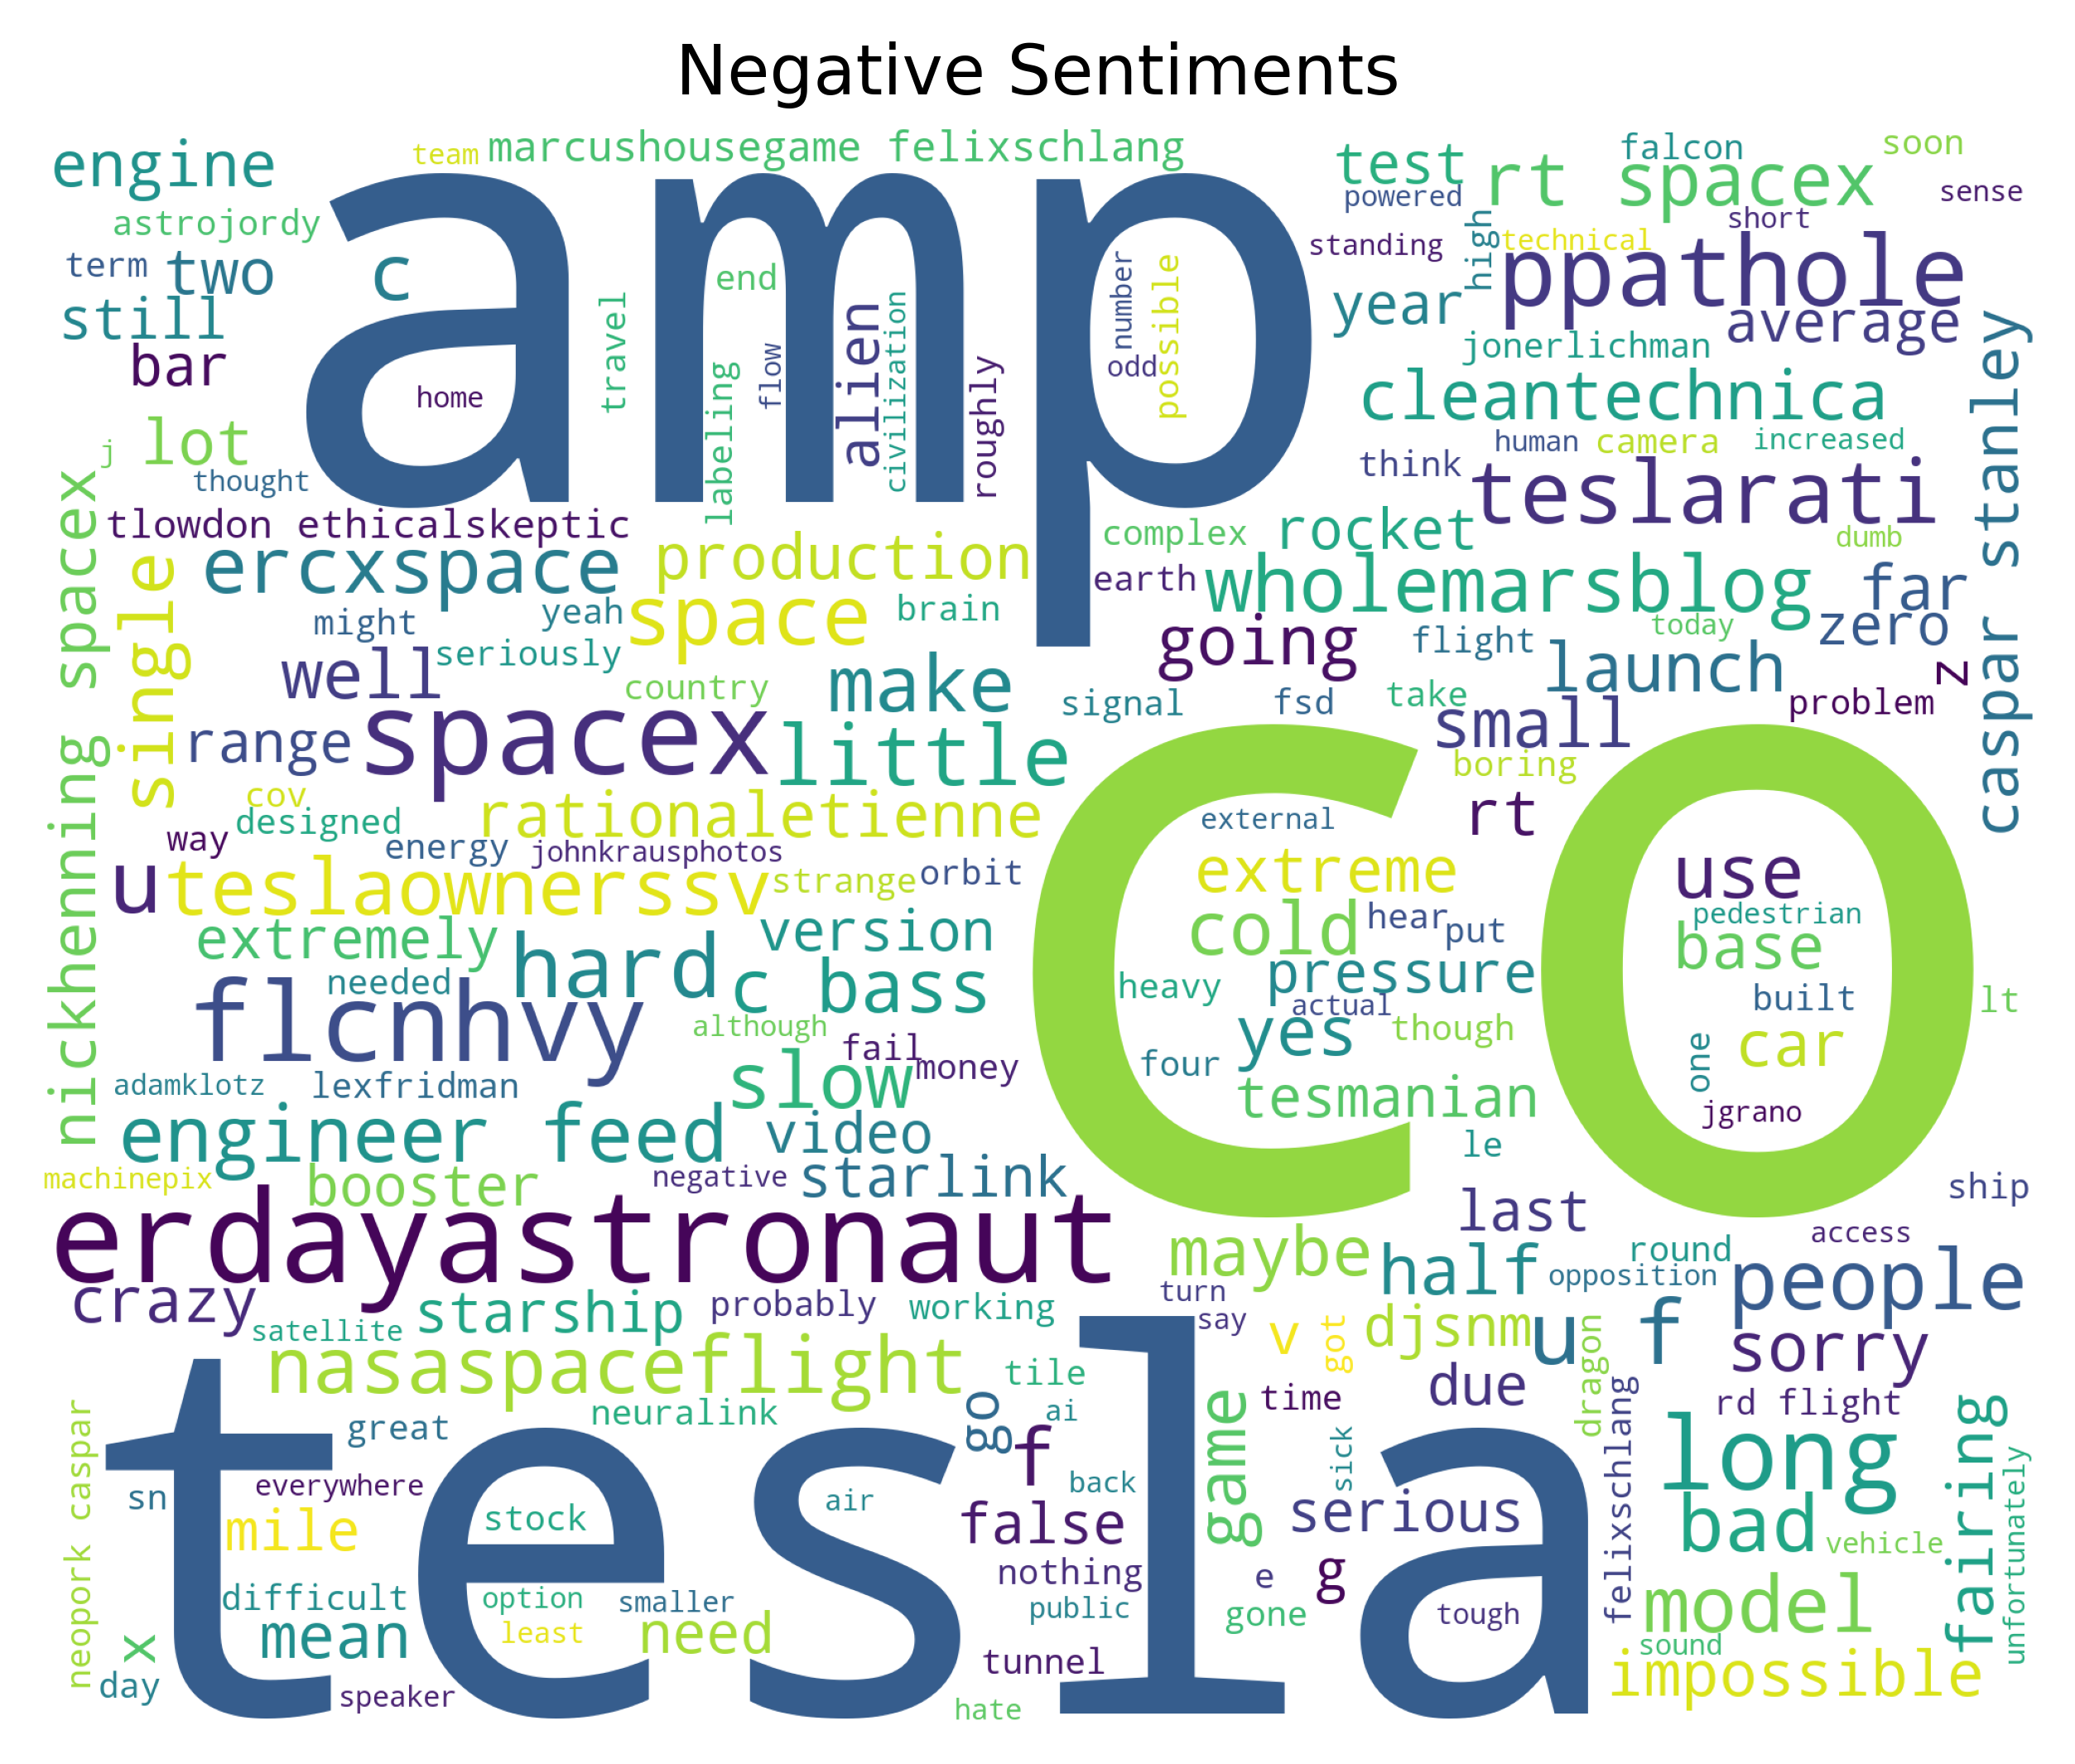

In [18]:
word_cloud(negative,'Negative Sentiments')

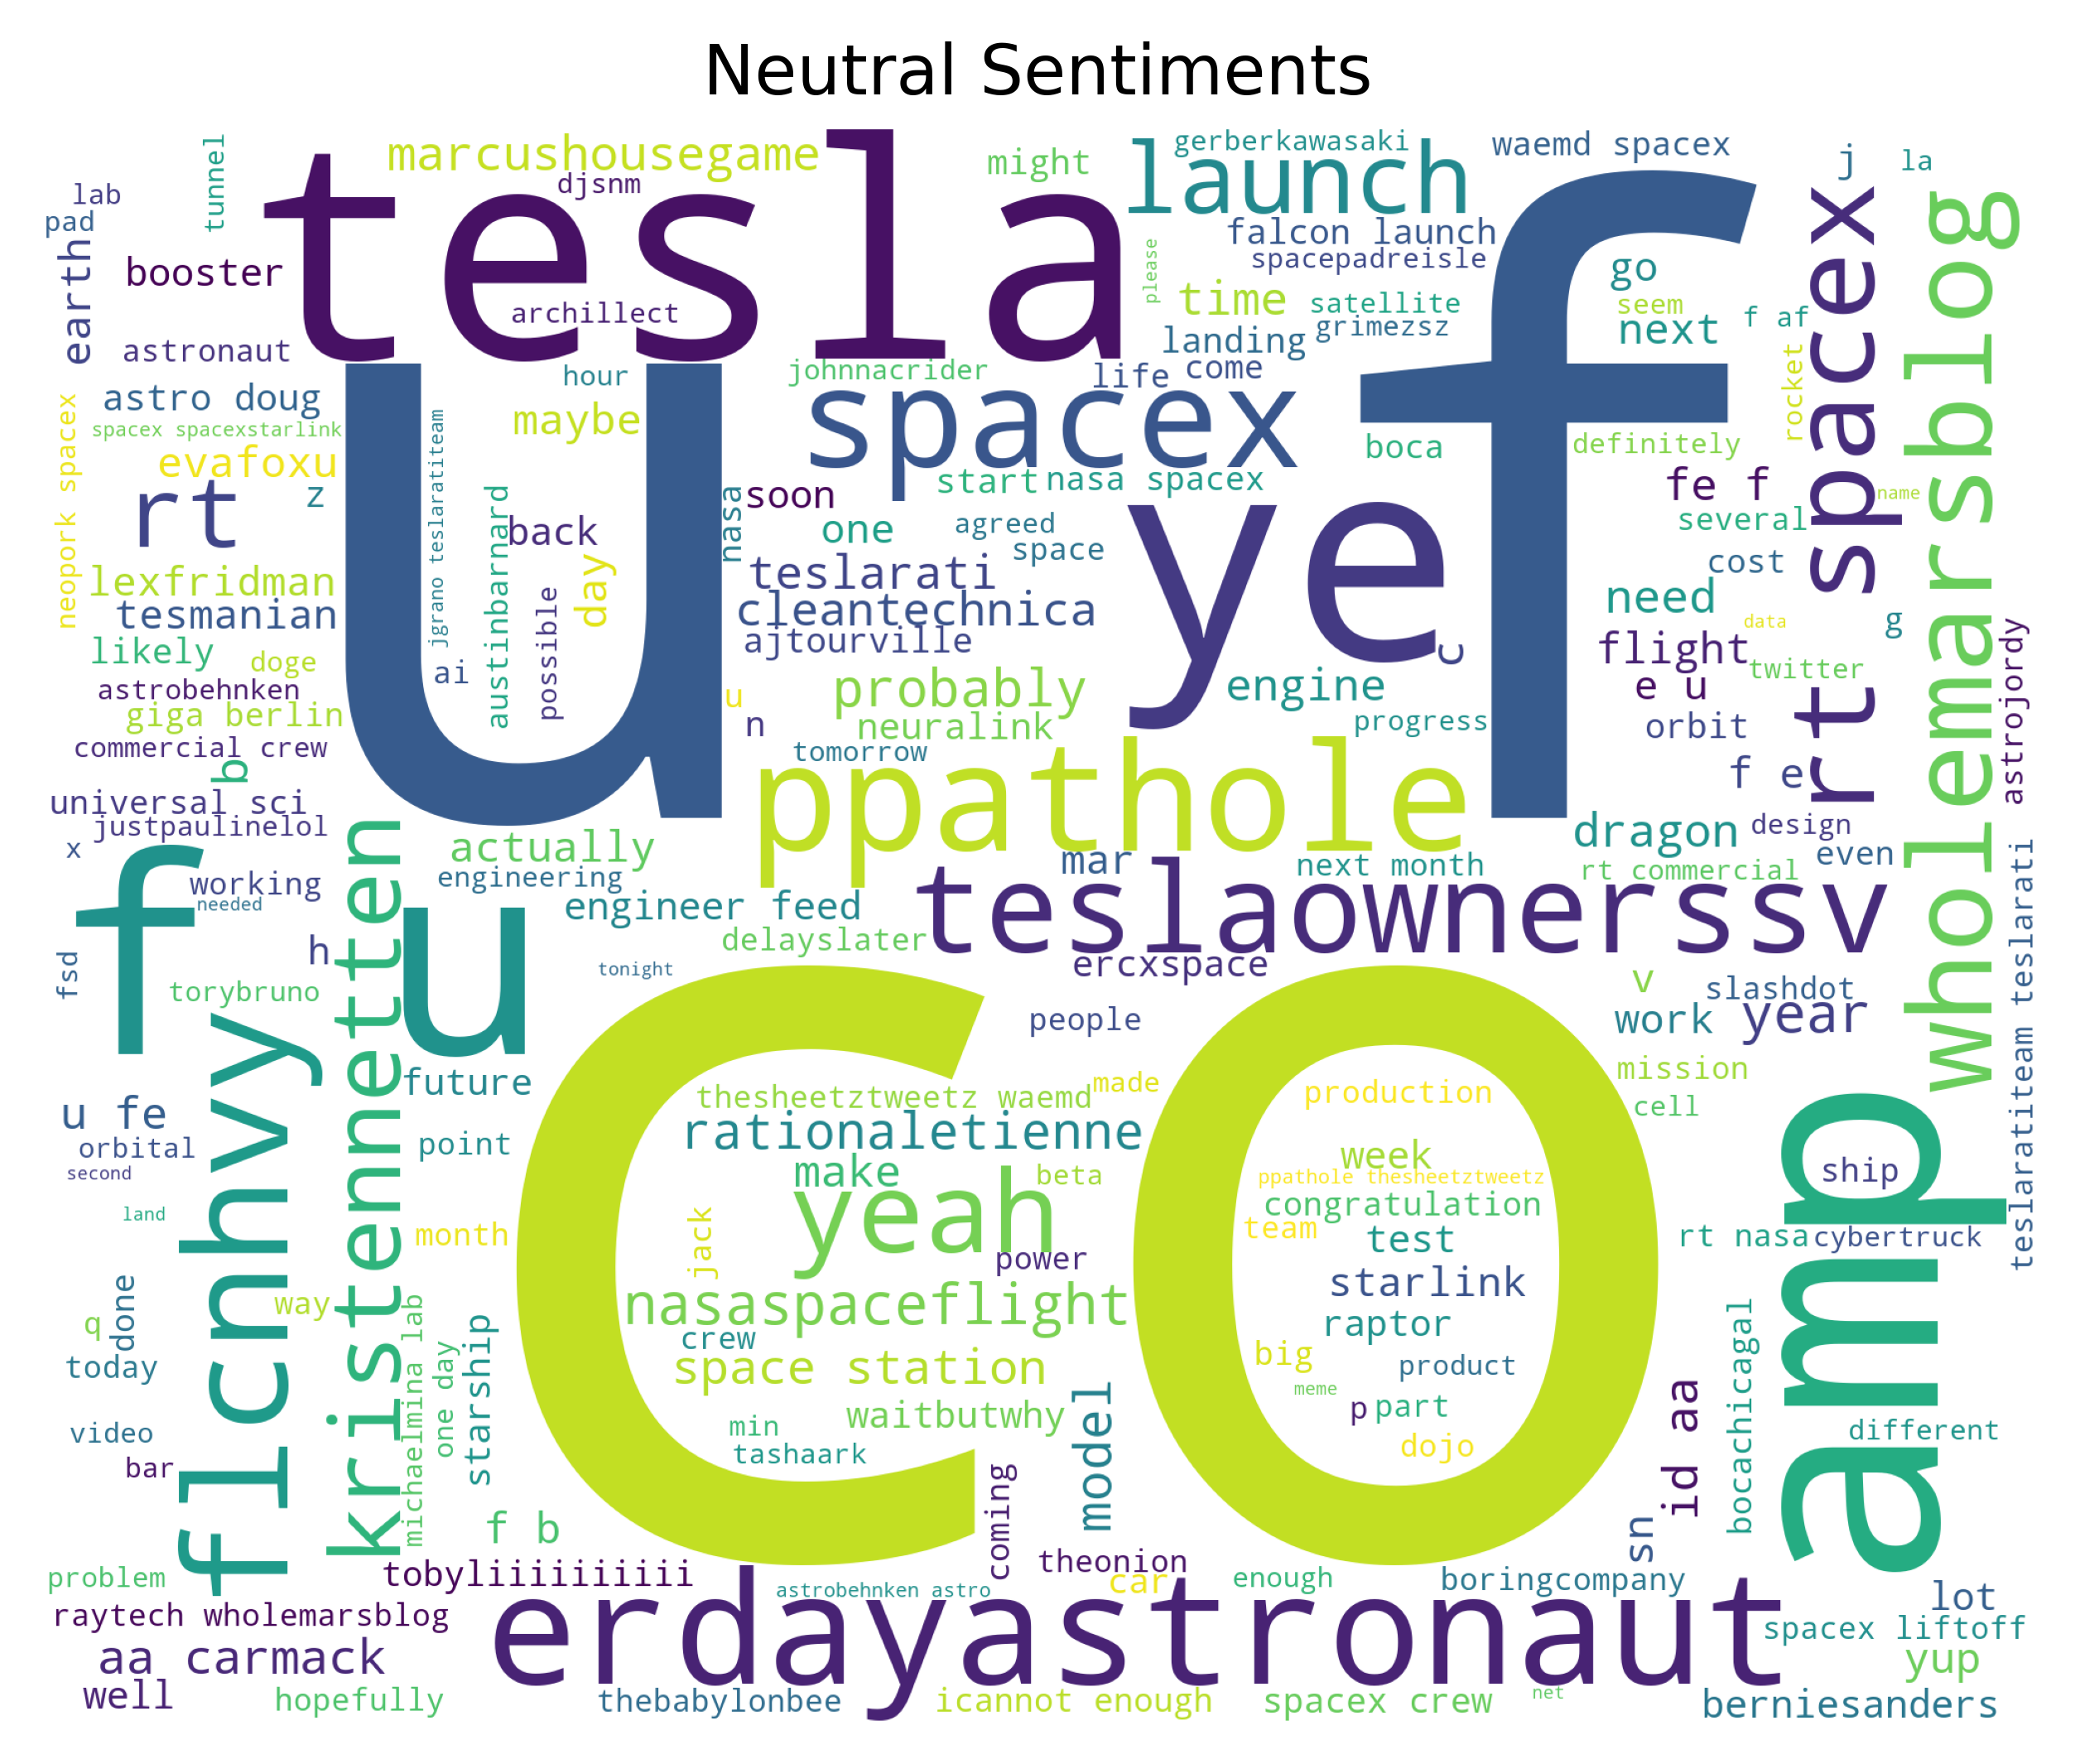

In [19]:
word_cloud(neutral,'Neutral Sentiments')

___

* ### <font color = 'blue'> <u> CONCLUSION </u>
    
    + #### Analysing the tweets through TextBlob Library, we can see 46% are Neutral Tweets, 43% are belong to Positive Sentiments and very less Negative sentiments are there around 10%.

<br>
<br>
<br>

> # <font color = 'magenta'><u>END</u>
___